### **Link Dataset :** https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market

### **Link Colab :** https://colab.research.google.com/drive/1NP2eTqusk2ETxCB8akeJv3mDSU-zC5-F?usp=sharing

### **Link Dataset Bersih :** https://drive.google.com/file/d/1zomxTH3yKszsOtCl70Oxe0ttFKTK26gO/view?usp=sharing

# **Profilling Data Awal (Pemeriksaan Umum)**

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv('/content/Melbourne_housing_FULL.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


# **Menemukan Kesalahan Data & Penanganannya**

## Cek dan merubah tipe data kolom Date : Object --> Datetime

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  object        
 6   SellerG        34857 non-null  object        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

None

## Menghapus Data Duplikat

In [ ]:
duplikat = df.duplicated().sum()
duplikat

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True)

duplikat = df.duplicated().sum()
duplikat

np.int64(0)

## Handling Missing Value

In [ ]:
missing= df.isnull().sum()
missing

,0
Suburb,0
Address,0
Rooms,0
Type,0
Price,7609
Method,0
SellerG,0
Date,0
Distance,1
Postcode,1


In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Percentage of missing values:")
display(missing_percentage)

Percentage of missing values:


,0
Suburb,0.000000
Address,0.000000
Rooms,0.000000
Type,0.000000
Price,21.829814
Method,0.000000
SellerG,0.000000
Date,0.000000
Distance,0.002869
Postcode,0.002869


In [ ]:
# Mengatasi missing value pada kolom dengan persentase missing rendah dengan modus
for col in ['Distance', 'Postcode', 'CouncilArea', 'Regionname', 'Propertycount']:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)

# Mengatasi missing value pada kolom numerik dengan persentase missing tinggi dengan median
numerical_cols_to_impute_median = ['Price', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']
for col in numerical_cols_to_impute_median:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

# Verifikasi Missing columns
print("Missing values after imputation:")
display(df[['Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname', 'Propertycount']].isnull().sum())

Missing values after imputation:


/tmp/ipython-input-3740178629.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)
/tmp/ipython-input-3740178629.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

,0
Price,0
Distance,0
Postcode,0
Bedroom2,0
Bathroom,0
Car,0
Landsize,0
BuildingArea,0
YearBuilt,0
CouncilArea,0


## Cek & Handling Outliers

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns
print("Numerical columns:")
display(numerical_cols)

Numerical columns:


Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

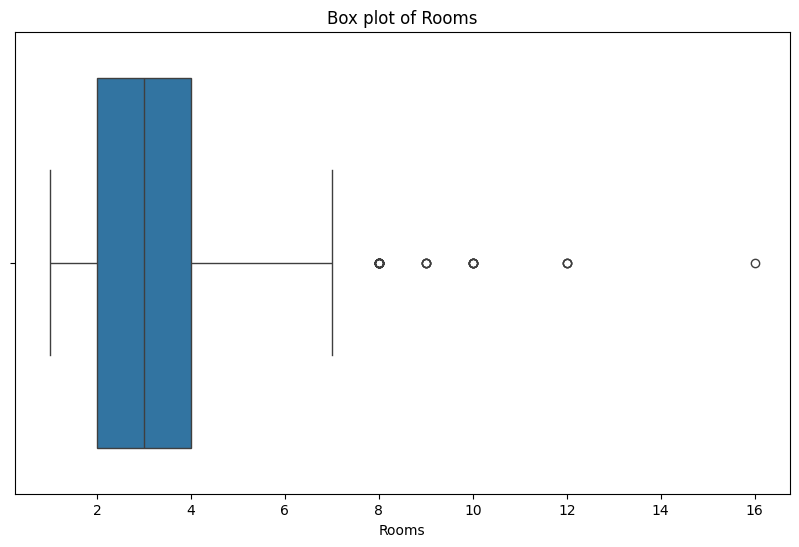

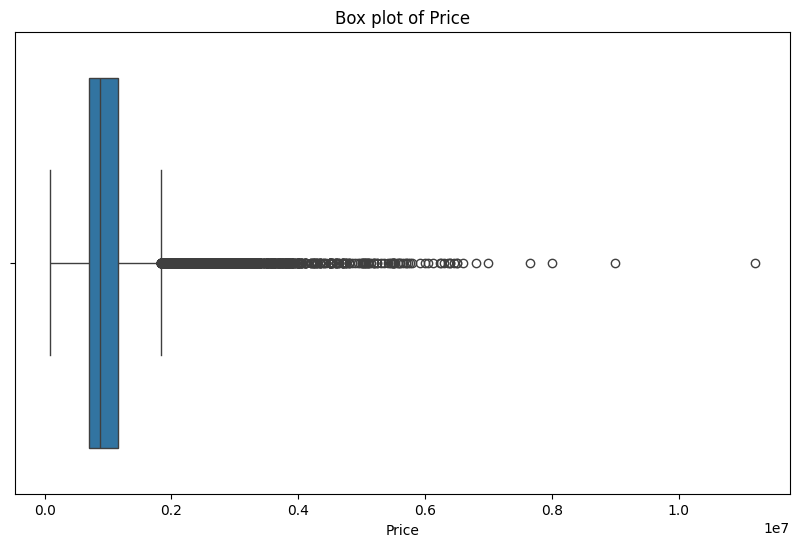

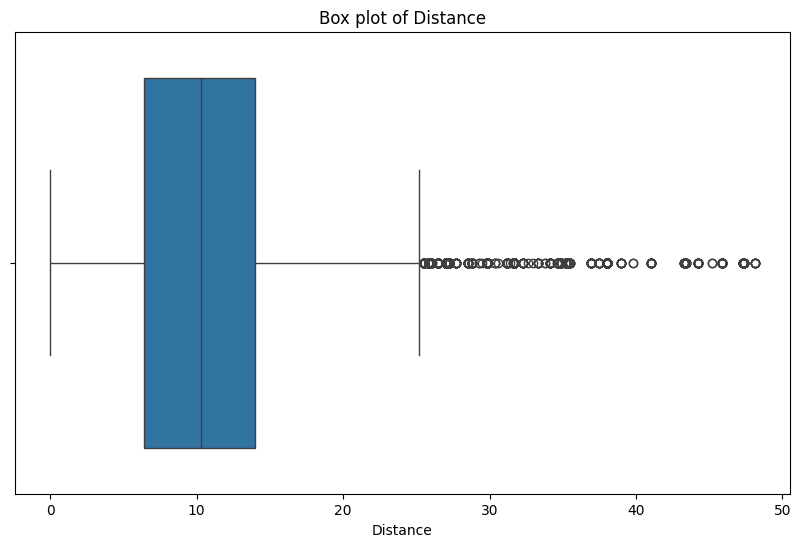

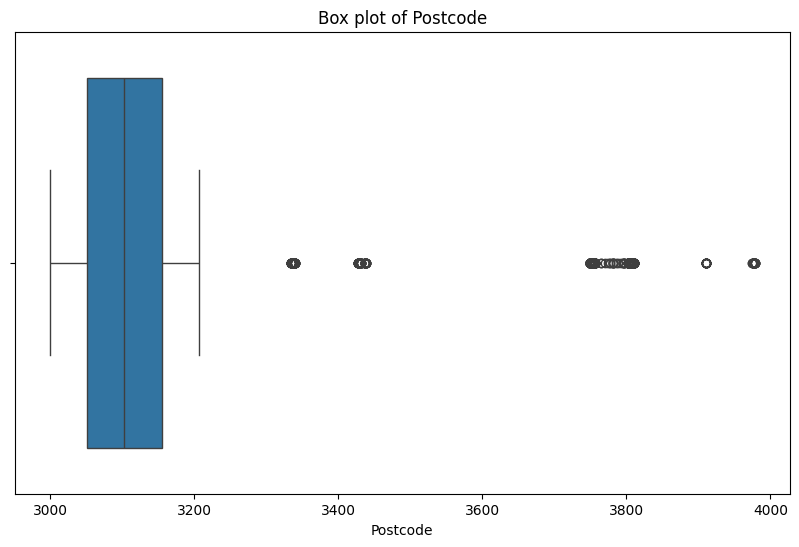

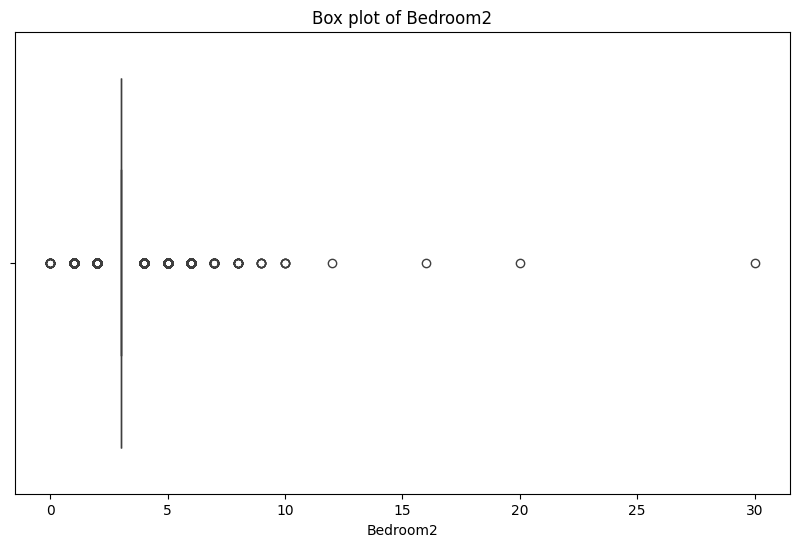

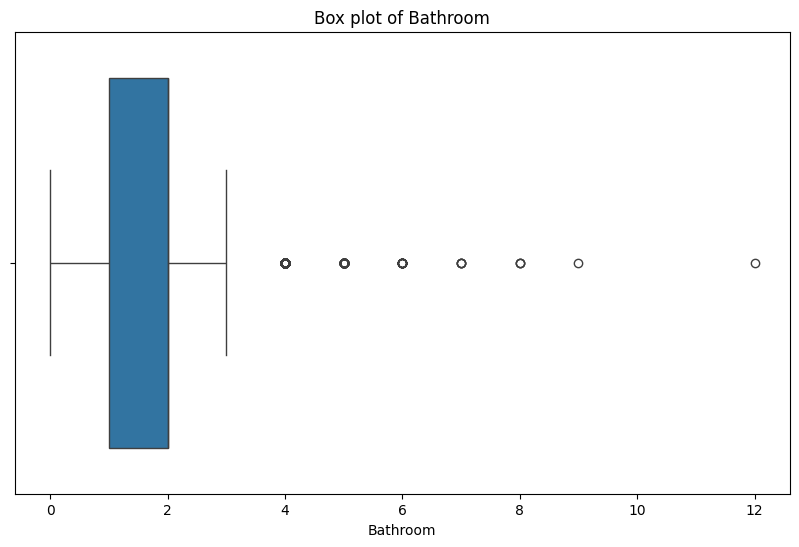

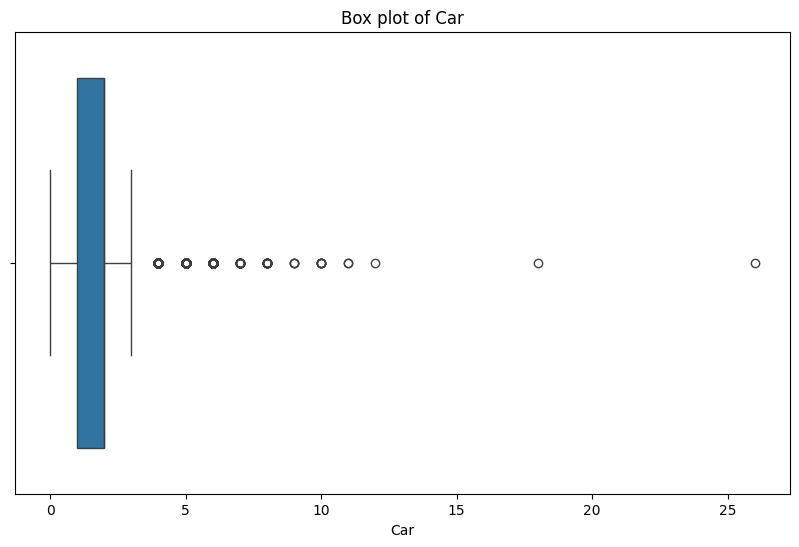

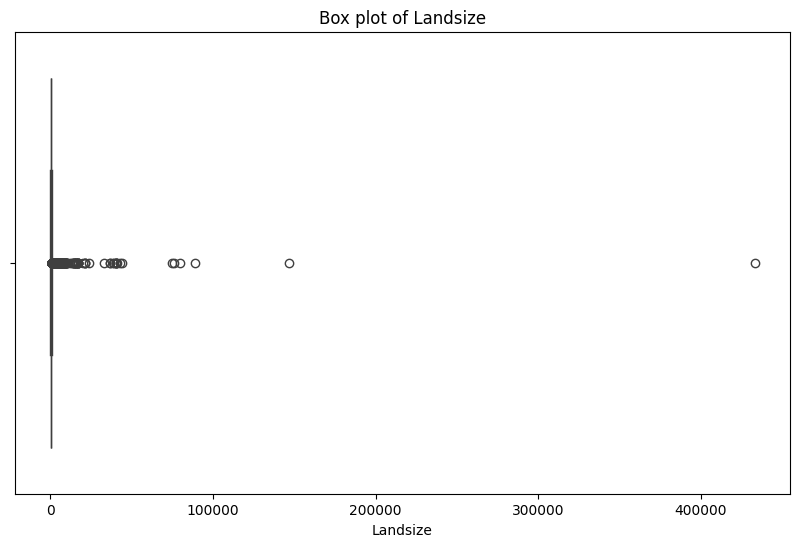

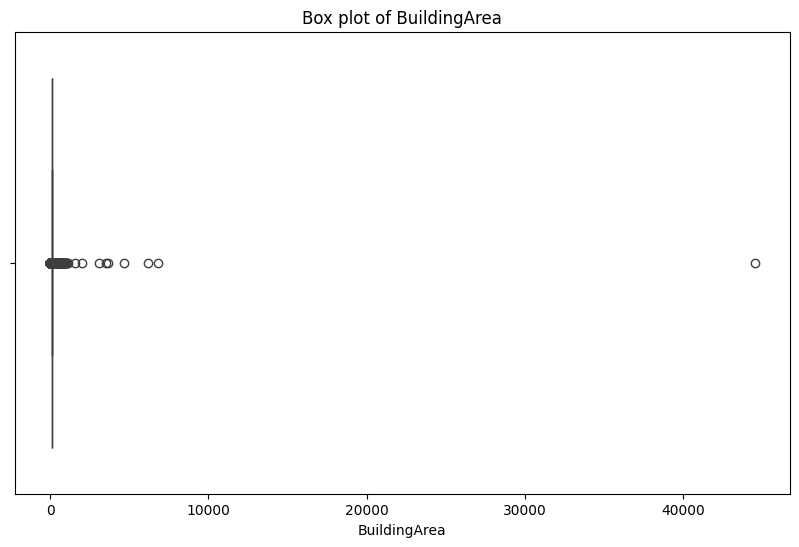

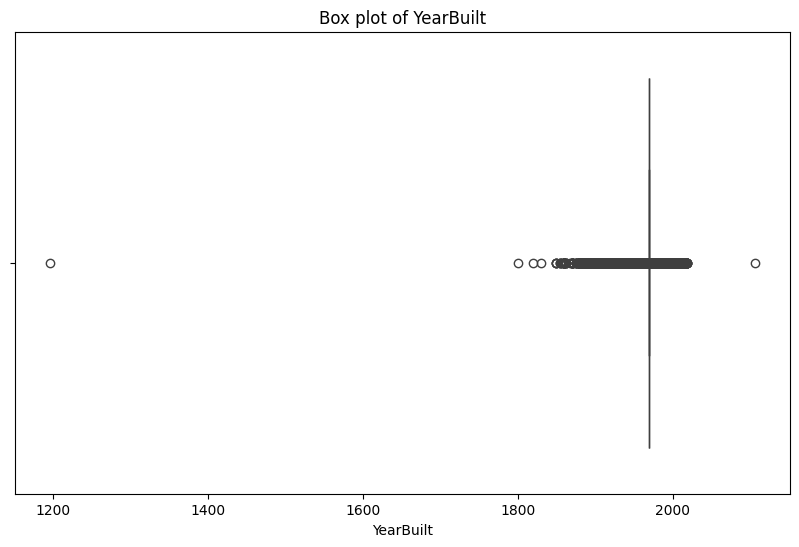

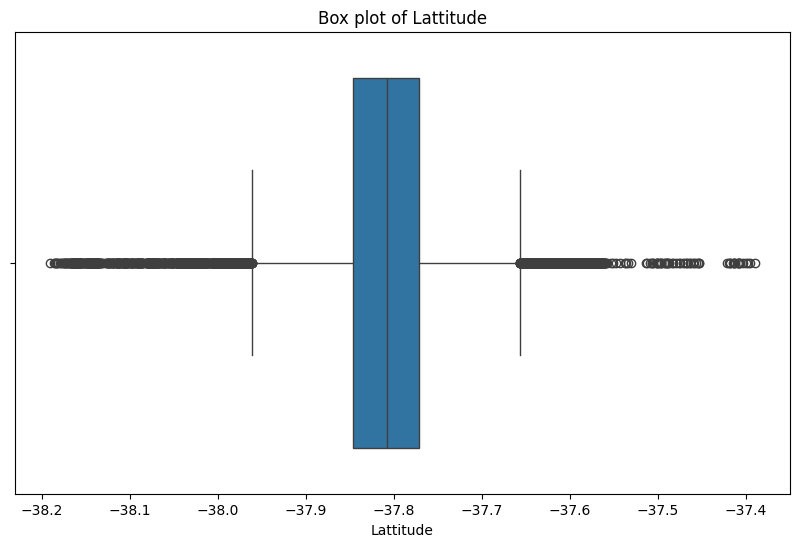

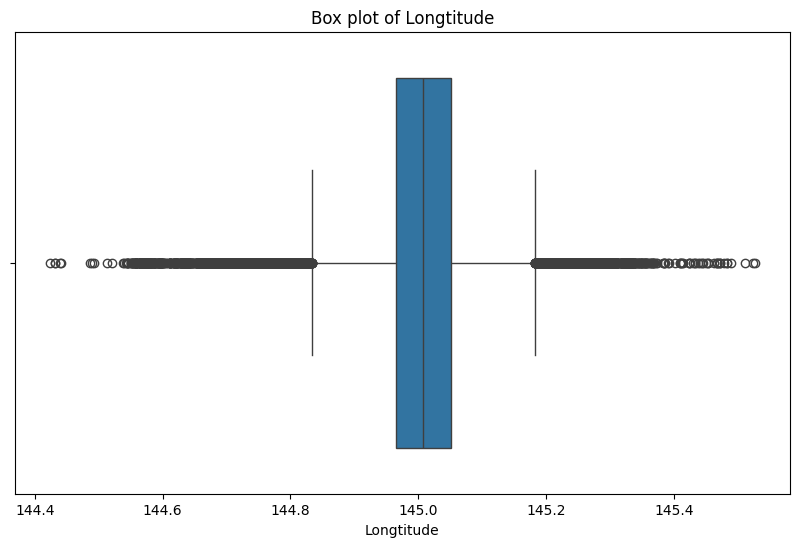

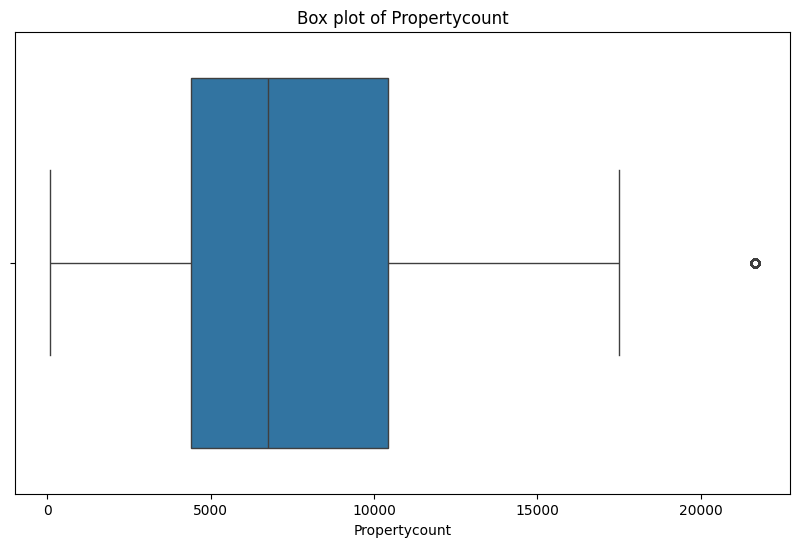

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Membuat boxplot untuk numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [ ]:
# Handle outliers dengan capping menggunakan IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply capping
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

print("Outliers handled by capping.")

Outliers handled by capping.


In [ ]:
# Verifikasi handling outlier dengan re-quantifying outliers dengan IQR
outlier_indices_after_capping = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    outlier_indices_after_capping[col] = outliers

print("Number of outliers per numerical column after capping (using IQR):")
for col, indices in outlier_indices_after_capping.items():
    print(f"{col}: {len(indices)}")

Number of outliers per numerical column after capping (using IQR):
Rooms: 0
Price: 0
Distance: 0
Postcode: 0
Bedroom2: 0
Bathroom: 0
Car: 0
Landsize: 0
BuildingArea: 0
YearBuilt: 0
Lattitude: 0
Longtitude: 0
Propertycount: 0


# **Rangkuman Justifikasi**

Rangkuman Justifikasi :

*   Memuat data: Memuat data dari file CSV ke dalam DataFrame untuk memudahkan
pengolahan dan analisis data.
*   Memeriksa informasi data (df.info()): Mendapatkan ringkasan awal tentang tipe data dan keberadaan nilai yang hilang di setiap kolom.
*   Mengubah tipe data 'date': Mengonversi kolom tanggal dari tipe 'object' menjadi 'datetime' agar data dapat dianalisis berdasarkan waktu.
*   Menghapus data duplikat: Menghilangkan entri data yang sama persis untuk memastikan keunikan setiap baris data.
*   Mengidentifikasi dan menganalisis missing value: Menghitung jumlah dan persentase nilai yang hilang untuk memahami sejauh mana masalah missing value dan menentukan strategi penanganannya. (Catatan: Penanganan missing value masih dalam proses/perlu peninjauan).
*   Mengidentifikasi kolom numerik: Menentukan kolom-kolom yang berisi data numerik sebagai persiapan untuk analisis outlier.
*   Memvisualisasikan outlier (box plot): Menggunakan box plot untuk secara visual mengidentifikasi adanya nilai-nilai ekstrem (outlier) dalam kolom numerik.
* Mengkuantifikasi outlier (iqr): Menggunakan metode IQR untuk secara statistik menghitung jumlah outlier berdasarkan batas bawah dan atas.
* Menangani outlier (capping): Mengganti nilai outlier dengan batas bawah atau atas IQR (capping) untuk mengurangi dampak nilai ekstrem tanpa menghapus data.
* Memverifikasi penanganan outlier: Memastikan bahwa outlier telah berhasil ditangani dengan menghitung kembali jumlah outlier setelah proses capping.

Langkah-langkah ini dilakukan sebagai bagian dari proses pembersihan data (data cleaning) untuk menyiapkan data agar lebih akurat dan sesuai untuk analisis atau pemodelan lebih lanjut.


# **Kesimpulan**

* Pemuatan dan pemeriksaan data: Data berhasil dimuat ke dalam DataFrame dan
informasi dasarnya telah diperiksa, termasuk tipe data dan keberadaan nilai yang hilang.
* Transformasi tipe data: Kolom 'Date' yang awalnya bertipe objek berhasil diubah menjadi tipe data datetime, memungkinkan analisis berbasis waktu.
* Penghapusan data duplikat: Satu baris data yang terdeteksi sebagai duplikat telah berhasil dihapus, memastikan setiap entri data bersifat unik.
* Identifikasi dan penanganan missing value: Nilai-nilai yang hilang telah diidentifikasi dan persentasenya dihitung. (Catatan: Strategi penanganan missing value lanjutan masih perlu dikonfirmasi atau disesuaikan).
* Identifikasi dan penanganan outlier: Kolom-kolom numerik telah diidentifikasi, outlier divisualisasikan menggunakan box plot, dikuantifikasi menggunakan metode IQR, dan ditangani dengan metode capping untuk mengurangi dampak nilai ekstrem tanpa menghapus data. Verifikasi setelah capping menunjukkan bahwa outlier telah berhasil diatasi berdasarkan kriteria IQR.

Secara keseluruhan, dataset telah melewati tahap pembersihan awal yang krusial untuk meningkatkan kualitas data sebelum digunakan untuk analisis lebih lanjut, pembangunan model, atau visualisasi yang lebih mendalam.